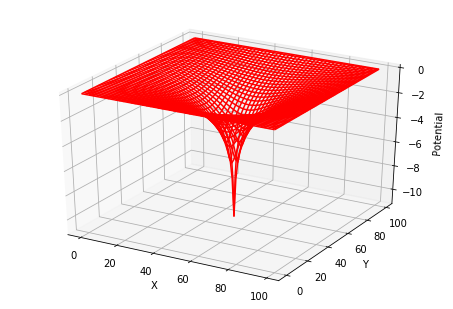

In [2]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy as np;

omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   
rho = zeros((Nmax,Nmax),float)
rho[50,50]=4*np.pi
for k in range(0, Nmax):  V[k,0] = 0.0              # Line at 100V
    
for iter in range(Niter):                                  
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-rho[i,j])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j]+omega*du # Finish this line on updating V[i,j]
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig